In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, SmartCorrelatedSelection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

In [2]:
train = pd.read_csv("train_B.csv")
val = pd.read_csv("val_B.csv")
test = pd.read_csv("test_B.csv")

In [3]:
# Separar características y etiquetas para conjunto de entrenamiento
X_train = train.drop(columns=['category'])
y_train = train['category']

# Separar características y etiquetas para conjunto de entrenamiento
X_test = test.drop(columns=['category'])
y_test = test['category']

X_val = val.drop(columns=['category'])
y_val = val['category']

In [30]:
RF = RandomForestClassifier(n_estimators=15, max_depth=15)

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8268096430807764


In [19]:
import joblib
RF = joblib.load('RF_model1.pkl')

y_pred = RF.predict(X_test)
print('Precision en test: ', accuracy_score(y_test, y_pred))

Precision en test:  0.8570037570444584


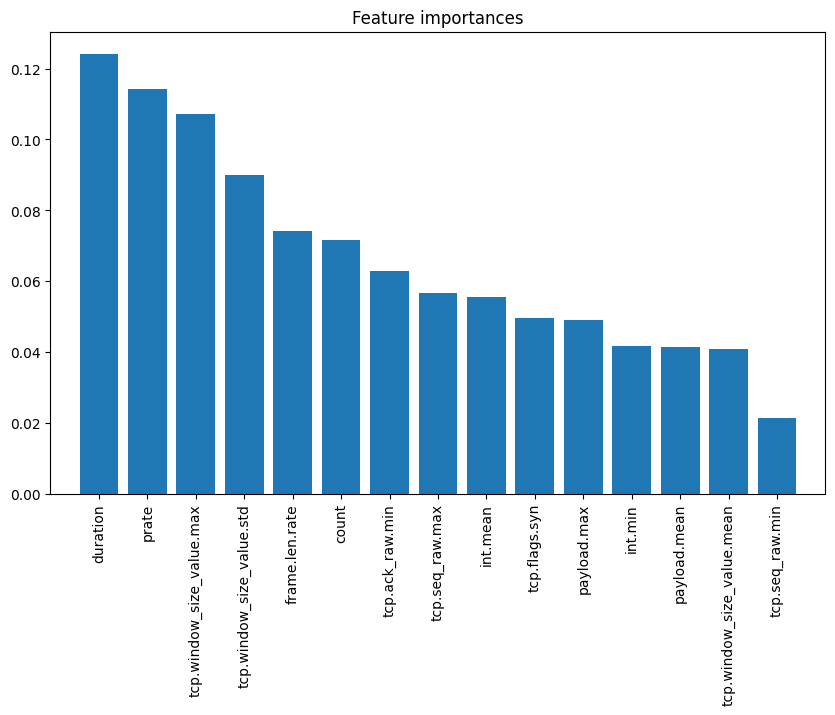

In [33]:
importances = RF.feature_importances_
#plotamos la importancia de las variables
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [4]:
RF = RandomForestClassifier(n_estimators=15, max_depth=15)

sel = SelectFromModel(RF, threshold=0.0285)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(max_depth=15, n_estimators=15),
                threshold=0.0285)

In [5]:
# this command let's me visualise those features that were selected.

# sklearn will select those features which importance values
# are greater than the mean of all the coefficients.

sel.get_support()

array([False,  True, False, False, False, False, False, False, False,
        True, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True, False, False])

In [6]:
# let's make a list and count the selected features

selected_feat = X_train.columns[(sel.get_support())]

len(selected_feat)

if "proto" not in selected_feat:
    selected_feat = selected_feat.append(pd.Index(["proto"]))
    
X_train = X_train[selected_feat]
X_val = X_val[selected_feat]
X_test = X_test[selected_feat]

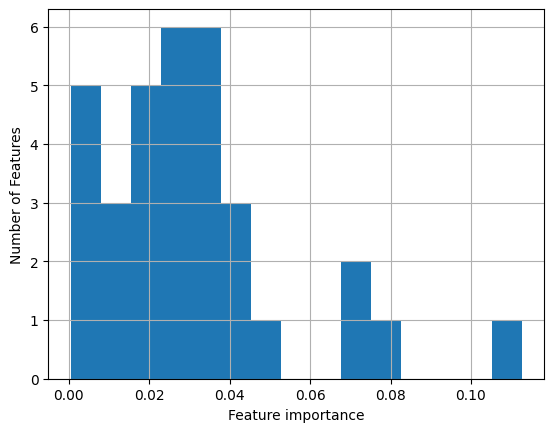

In [7]:
# and now let's plot the distribution of importances

pd.Series(sel.estimator_.feature_importances_.ravel()).hist(bins=15)
plt.xlabel('Feature importance')
plt.ylabel('Number of Features')
plt.show()

In [8]:
RF = RandomForestClassifier()

param_grid = {'n_estimators': [15], 'max_depth': [15]} 
grid = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy', return_train_score=True, verbose=1)
grid.fit(X_train, y_train)

print('Best Cross Validation Score:', grid.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Cross Validation Score: 0.8145487238667777


In [ ]:
RF =  grid.best_estimator_

print('Train Score:', RF.score(X_train, y_train))

y_pred = RF.predict(X_test)

start2=time.time()
print('Precision en test: ', accuracy_score(y_test, y_pred))
stop2=time.time()


tiempo2 = stop2 - start2
print(f"Tiempo de prediccion (Test) RF: {tiempo2}s")

Train Score: 0.8441802420761654
Precision en test:  0.8372667501565435
Tiempo de prediccion (Test) RF: 0.26689577102661133s


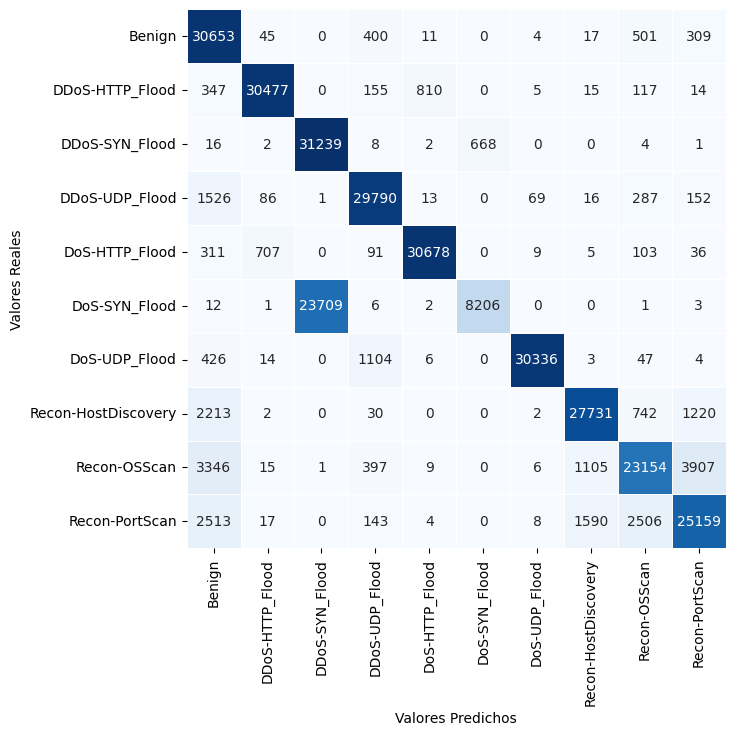

In [10]:
cm = metrics.confusion_matrix(y_test, y_pred)
normalized_matrix = cm #/ cm.sum(axis=1, keepdims=True)

class_names = ['Benign', 'DDoS-HTTP_Flood', 'DDoS-SYN_Flood', 'DDoS-UDP_Flood', 'DoS-HTTP_Flood', 'DoS-SYN_Flood', 'DoS-UDP_Flood', 'Recon-HostDiscovery', 'Recon-OSScan', 'Recon-PortScan']

sns.heatmap(normalized_matrix, annot = True, fmt = '0.0f', linewidth=0.5, xticklabels=class_names,
            yticklabels=class_names, square = True, cmap='Blues', cbar = False)

fig = plt.gcf()
fig.set_size_inches(7, 7)

plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

In [11]:
import joblib
joblib.dump(RF, 'RF_model2.pkl')

['RF_model2.pkl']

In [32]:
X_train = pd.DataFrame(X_train, columns=selected_feat)
X_val = pd.DataFrame(X_val, columns=selected_feat)
X_test = pd.DataFrame(X_test, columns=selected_feat)

In [12]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
train = pd.concat([X_train, y_train], axis=1)

X_val_reducido = X_val.reset_index(drop=True)
y_val_reducido = y_val.reset_index(drop=True)
val = pd.concat([X_val_reducido, y_val_reducido], axis=1)

X_test_reducido = X_test.reset_index(drop=True)
y_test_reducido = y_test.reset_index(drop=True)
test = pd.concat([X_test_reducido, y_test_reducido], axis=1)


In [13]:
train.to_csv('train_QNN2.csv', index=False)
test.to_csv('test_QNN2.csv', index=False)
val.to_csv('val_QNN2.csv', index=False)